In [1]:
import pandas as pd
import pickle
from nltk import FreqDist
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models.keyedvectors import KeyedVectors

from tensorflow.keras.layers import Flatten,Embedding,Dense
from tensorflow.keras.layers import TextVectorization
from tensorflow import keras



# machine learning
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
poptypes_df = pd.read_csv("../data/poptypes_df.csv")
poptypes = poptypes_df["poptype"].tolist()
poptypes

['right-wing',
 'left-wing',
 'nationalist',
 'nativist',
 'radical',
 'moderate',
 'authoritatian',
 'inclusive',
 'exclusive',
 'neoliberal']

In [3]:
with open("../data/concs_labeled_min.pickle", "rb") as f:
    concs_labeled = pickle.load(f)

In [4]:
concs_labeled[:10]

[(['legislative',
   'election',
   'substantial',
   'body',
   'research',
   'document',
   'connection',
   'political',
   'discontent',
   'populist',
   'voting',
   'expectation',
   'group',
   'relatively',
   'engaged',
   'voter',
   'non-abstaining',
   'mainstream',
   'party',
   'supporter'],
  'nationalist',
  '2020',
  'Bakker et al. 2020'),
 (['degree',
   'empirical',
   'validation',
   'latent',
   'disaﬀection',
   'measure',
   'disaﬀected',
   'regression',
   'propensity',
   'vote',
   'populist',
   'party',
   'mainstream',
   'voter',
   'error',
   'disaﬀection',
   'disaﬀection',
   'political',
   'interest',
   'prospective'],
  'nationalist',
  '2020',
  'Bakker et al. 2020'),
 (['show',
   'clear',
   'tendency',
   'populist',
   'chief',
   'executive',
   'fact',
   'strangle',
   'democracy',
   'populist',
   'wave',
   'engulf',
   'advanced',
   'industrialize',
   'country',
   'fear',
   'extend',
   'longstanding',
   'liberalpluralist',
  

In [5]:
len(concs_labeled)

7455

In [6]:
pd.DataFrame(concs_labeled[:10])

,0,1,2,3
0,"[legislative, election, substantial, body, res...",nationalist,2020,Bakker et al. 2020
1,"[degree, empirical, validation, latent, disaﬀe...",nationalist,2020,Bakker et al. 2020
2,"[show, clear, tendency, populist, chief, execu...",authoritatian,2020,Weyland 2020
3,"[tactic, exaggerated, shock, fascism, rise, in...",authoritatian,2020,Weyland 2020
4,"[immune, fascism, bode, longstanding, democrac...",authoritatian,2020,Weyland 2020
5,"[industrialize, world, recent, upsurge, populi...",authoritatian,2020,Weyland 2020
6,"[set, case, somewhat, similar, effort, recentl...",authoritatian,2020,Weyland 2020
7,"[huge, resource, windfall, clear, success, ove...",authoritatian,2020,Weyland 2020
8,"[support, allow, remove, remain, obstacle, pow...",authoritatian,2020,Weyland 2020
9,"[brink, analysis, show, kind, institutional, w...",authoritatian,2020,Weyland 2020


In [7]:
y = [el[1] for el in concs_labeled]

In [8]:
labels_counts = dict([(poptype, y.count(poptype)) for poptype in poptypes])
labels_counts

{'right-wing': 2623,
 'left-wing': 717,
 'nationalist': 1651,
 'nativist': 191,
 'radical': 542,
 'moderate': 248,
 'authoritatian': 647,
 'inclusive': 210,
 'exclusive': 386,
 'neoliberal': 240}

In [9]:
classes = poptypes

# Features preprocessing

In [10]:
concs = [el[0] for el in concs_labeled]
labels = [el[1] for el in concs_labeled]
years = [el[2] for el in concs_labeled]

In [11]:
vocab_counts = FreqDist([w for conc in concs for w in conc]).most_common()
vocab_counts[:50]

[('populist', 7681),
 ('populism', 5465),
 ('party', 3659),
 ('political', 1718),
 ('people', 1164),
 ('democracy', 853),
 ('politic', 737),
 ('leader', 720),
 ('support', 677),
 ('case', 662),
 ('discourse', 582),
 ('attitude', 576),
 ('effect', 551),
 ('economic', 534),
 ('elite', 532),
 ('country', 514),
 ('study', 510),
 ('government', 502),
 ('movement', 483),
 ('democratic', 478),
 ('ideology', 473),
 ('different', 441),
 ('policy', 436),
 ('power', 430),
 ('voter', 421),
 ('new', 419),
 ('argue', 418),
 ('election', 401),
 ('analysis', 391),
 ('issue', 385),
 ('focus', 379),
 ('social', 378),
 ('european', 374),
 ('article', 372),
 ('level', 369),
 ('rise', 365),
 ('electoral', 356),
 ('form', 355),
 ('rhetoric', 347),
 ('vote', 336),
 ('state', 336),
 ('liberal', 327),
 ('mainstream', 318),
 ('medium', 309),
 ('appeal', 307),
 ('term', 304),
 ('position', 304),
 ('result', 298),
 ('claim', 292),
 ('research', 288)]

In [12]:
len(vocab_counts)

9394

In [13]:
#N = 10000
vocab = [tup[0] for tup in vocab_counts] #[:N]

In [14]:
vectorizer = TfidfVectorizer(token_pattern=r"\w+\/?|\_\w+", vocabulary=vocab, lowercase=False)
X = vectorizer.fit_transform([" ".join(conc) for conc in concs]).A

In [15]:
type(X)

numpy.ndarray

In [16]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,9384,9385,9386,9387,9388,9389,9390,9391,9392,9393
0,0.055182,0.000000,0.086948,0.107106,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.035653,0.000000,0.056176,0.069200,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.096336,0.000000,0.000000,0.000000,0.0,0.121189,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.049034,0.000000,0.000000,0.000000,0.0,0.123368,0.000000,0.000000,0.0,0.129435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.049740,0.062958,0.000000,0.000000,0.0,0.125143,0.000000,0.131992,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450,0.105726,0.066911,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7451,0.112300,0.071072,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7452,0.053611,0.067858,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7453,0.055129,0.000000,0.086863,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [17]:
len(y)

7455

In [18]:
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X, y, years, test_size=0.2, random_state=1)

# Model development

## Logistic regression

In [19]:
LR = LogisticRegression(penalty="l2", C=100, max_iter=1000, n_jobs=8)
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.6042924211938296

In [20]:
y_predicted = LR.predict(X_test)
y_predicted[:10]

array(['left-wing', 'right-wing', 'nationalist', 'moderate', 'right-wing',
       'right-wing', 'nationalist', 'nationalist', 'right-wing',
       'right-wing'], dtype='<U13')

In [21]:
y_test[:10]

['right-wing',
 'nationalist',
 'radical',
 'moderate',
 'right-wing',
 'nationalist',
 'nationalist',
 'nationalist',
 'right-wing',
 'radical']

In [22]:
f1_score(y_predicted, y_test, average="weighted")

0.6131541120180419

## Multinomial Naive Bayes

In [32]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
MNB.score(X_test, y_test)

0.41010498687664043

## Random Forests

In [33]:
RF = RandomForestClassifier(n_jobs=-1, n_estimators=100)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.568241469816273

## Extremely Randomized Trees

In [34]:
# apply carefully! takes time
ET = ExtraTreesClassifier(n_jobs=-1, n_estimators=100)
ET.fit(X_train, y_train)
ET.score(X_test, y_test)

0.6148293963254593

# Continuing with Logistic Regression

In [23]:
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X, y, years, test_size=0.2, random_state=0)

In [24]:
LR = LogisticRegression(penalty="l2", C=100, max_iter=1000, n_jobs=8)
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.6224010731052985

In [37]:
classifier = LR

In [38]:
classifier.score(X_test, y_test)

0.6224010731052985

In [39]:
y_predicted = classifier.predict(X_test)
f1_score(y_predicted, y_test, average="weighted")

0.6329338320952581

In [40]:
len(years_test)

1491

In [41]:
test_classes_reality = dict([(poptype, list(y_test).count(poptype)) for poptype in poptypes])
test_classes_reality

{'right-wing': 517,
 'left-wing': 144,
 'nationalist': 318,
 'nativist': 40,
 'radical': 113,
 'moderate': 58,
 'authoritatian': 136,
 'inclusive': 45,
 'exclusive': 69,
 'neoliberal': 51}

In [42]:
labels = poptypes
labels

['right-wing',
 'left-wing',
 'nationalist',
 'nativist',
 'radical',
 'moderate',
 'authoritatian',
 'inclusive',
 'exclusive',
 'neoliberal']

In [43]:
labels_reality = [t[0] + " (N={})".format(str(t[1])) for t in test_classes_reality.items()]
labels_reality

['right-wing (N=517)',
 'left-wing (N=144)',
 'nationalist (N=318)',
 'nativist (N=40)',
 'radical (N=113)',
 'moderate (N=58)',
 'authoritatian (N=136)',
 'inclusive (N=45)',
 'exclusive (N=69)',
 'neoliberal (N=51)']

In [44]:
test_classes_prediction =  dict([(poptype, list(y_predicted).count(poptype)) for poptype in poptypes])
test_classes_prediction

{'right-wing': 631,
 'left-wing': 118,
 'nationalist': 384,
 'nativist': 19,
 'radical': 91,
 'moderate': 37,
 'authoritatian': 115,
 'inclusive': 20,
 'exclusive': 49,
 'neoliberal': 27}

In [45]:
labels_prediction = [t[0] + " (N={})".format(str(t[1])) for t in test_classes_prediction.items()]
labels_prediction

['right-wing (N=631)',
 'left-wing (N=118)',
 'nationalist (N=384)',
 'nativist (N=19)',
 'radical (N=91)',
 'moderate (N=37)',
 'authoritatian (N=115)',
 'inclusive (N=20)',
 'exclusive (N=49)',
 'neoliberal (N=27)']

In [46]:
pd.DataFrame([test_classes_reality, test_classes_prediction], index=["reality", "prediction"]).T

,reality,prediction
right-wing,517,631
left-wing,144,118
nationalist,318,384
nativist,40,19
radical,113,91
moderate,58,37
authoritatian,136,115
inclusive,45,20
exclusive,69,49
neoliberal,51,27


In [47]:
matrix = confusion_matrix(y_test, y_predicted, labels=labels) #, normalize="true")
dataframe = pd.DataFrame(matrix, index=labels_reality, columns=labels_prediction)
dataframe

,right-wing (N=631),left-wing (N=118),nationalist (N=384),nativist (N=19),radical (N=91),moderate (N=37),authoritatian (N=115),inclusive (N=20),exclusive (N=49),neoliberal (N=27)
right-wing (N=517),407,16,65,4,9,1,5,2,7,1
left-wing (N=144),50,48,28,1,11,0,2,0,3,1
nationalist (N=318),66,12,225,2,3,0,7,0,1,2
nativist (N=40),14,2,9,11,2,0,1,0,1,0
radical (N=113),31,11,7,0,53,1,7,1,1,1
moderate (N=58),12,8,5,0,1,31,0,1,0,0
authoritatian (N=136),20,8,12,1,4,1,86,0,2,2
inclusive (N=45),12,5,5,0,3,1,1,16,2,0
exclusive (N=69),13,3,15,0,0,1,4,0,32,1
neoliberal (N=51),6,5,13,0,5,1,2,0,0,19


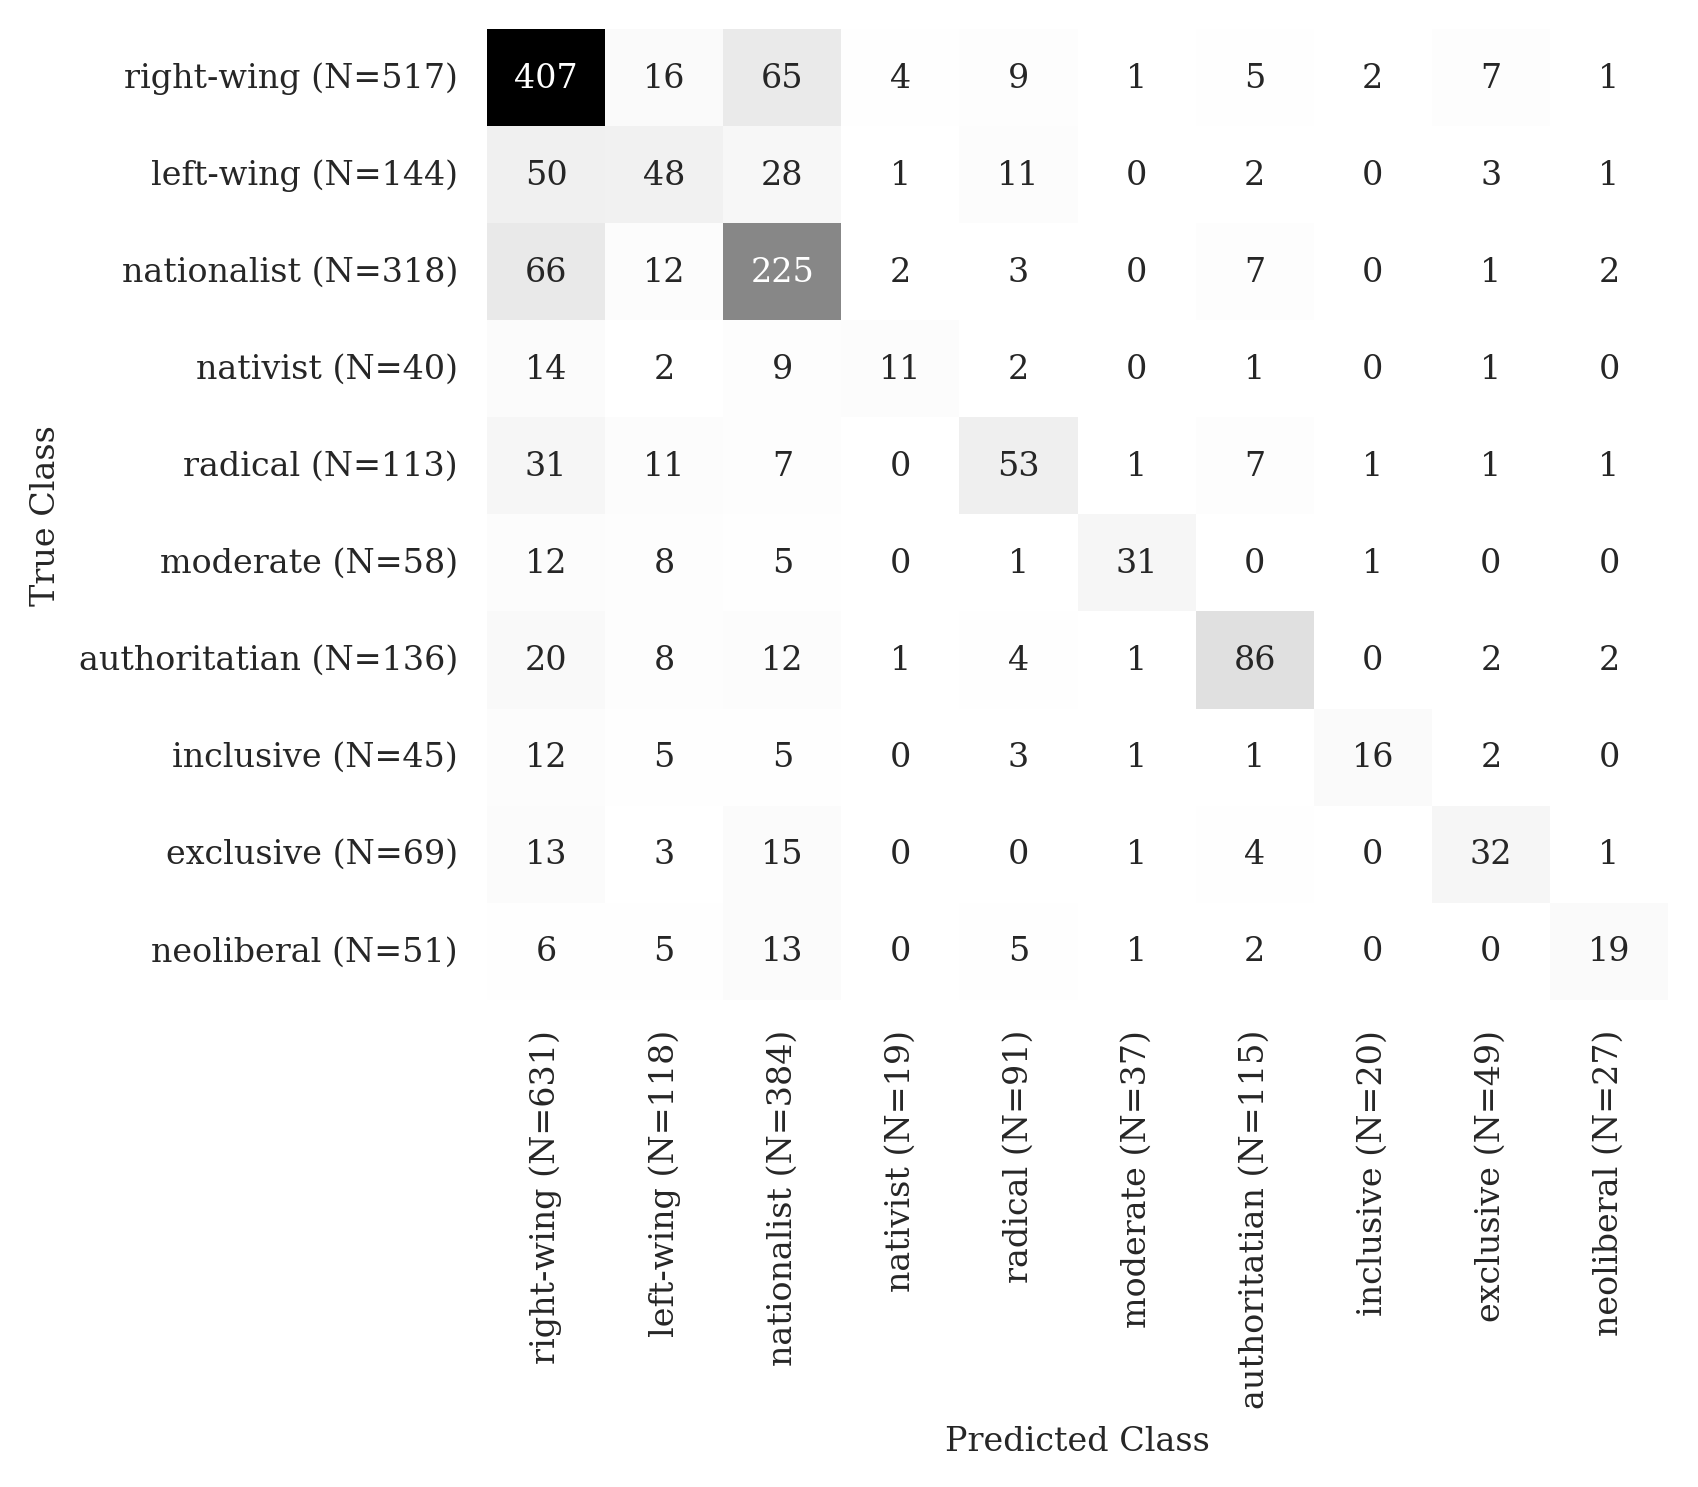

In [48]:
plt.style.use("fast")
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 8

fig, ax = plt.subplots(figsize=(5.7, 5), dpi=300, tight_layout=True)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greys", fmt='d', ax=ax)

ax.set_ylabel("True Class")
ax.set_xlabel("Predicted Class")
plt.show()

In [49]:
fig.savefig("../figures/confusion_matrix_LR.png")

# Matrix as network

In [50]:
labels_mapping = dict([(i,label) for i, label in enumerate(labels)])
classes_inxs = dict(zip(labels, range(len(labels))))
classes_inxs

{'right-wing': 0,
 'left-wing': 1,
 'nationalist': 2,
 'nativist': 3,
 'radical': 4,
 'moderate': 5,
 'authoritatian': 6,
 'inclusive': 7,
 'exclusive': 8,
 'neoliberal': 9}

In [51]:
labels_mapping

{0: 'right-wing',
 1: 'left-wing',
 2: 'nationalist',
 3: 'nativist',
 4: 'radical',
 5: 'moderate',
 6: 'authoritatian',
 7: 'inclusive',
 8: 'exclusive',
 9: 'neoliberal'}

In [52]:
matrix = confusion_matrix(y_test, y_predicted, labels=labels, normalize="true")
matrix

array([[0.78723404, 0.03094778, 0.12572534, 0.00773694, 0.01740812,
        0.00193424, 0.00967118, 0.00386847, 0.01353965, 0.00193424],
       [0.34722222, 0.33333333, 0.19444444, 0.00694444, 0.07638889,
        0.        , 0.01388889, 0.        , 0.02083333, 0.00694444],
       [0.20754717, 0.03773585, 0.70754717, 0.00628931, 0.00943396,
        0.        , 0.02201258, 0.        , 0.00314465, 0.00628931],
       [0.35      , 0.05      , 0.225     , 0.275     , 0.05      ,
        0.        , 0.025     , 0.        , 0.025     , 0.        ],
       [0.27433628, 0.09734513, 0.0619469 , 0.        , 0.46902655,
        0.00884956, 0.0619469 , 0.00884956, 0.00884956, 0.00884956],
       [0.20689655, 0.13793103, 0.0862069 , 0.        , 0.01724138,
        0.53448276, 0.        , 0.01724138, 0.        , 0.        ],
       [0.14705882, 0.05882353, 0.08823529, 0.00735294, 0.02941176,
        0.00735294, 0.63235294, 0.        , 0.01470588, 0.01470588],
       [0.26666667, 0.11111111, 0.1111111

In [53]:
matrix.diagonal()

array([0.78723404, 0.33333333, 0.70754717, 0.275     , 0.46902655,
       0.53448276, 0.63235294, 0.35555556, 0.46376812, 0.37254902])

In [54]:
import networkx as nx

In [55]:
M = nx.from_numpy_matrix(matrix, parallel_edges=True, create_using=nx.MultiDiGraph)

In [56]:
M.remove_edges_from(nx.selfloop_edges(M))
M.edges(data=True)

OutMultiEdgeDataView([(0, 1, {'weight': 0.030947775628626693}), (0, 2, {'weight': 0.12572533849129594}), (0, 3, {'weight': 0.007736943907156673}), (0, 4, {'weight': 0.017408123791102514}), (0, 5, {'weight': 0.0019342359767891683}), (0, 6, {'weight': 0.009671179883945842}), (0, 7, {'weight': 0.0038684719535783366}), (0, 8, {'weight': 0.013539651837524178}), (0, 9, {'weight': 0.0019342359767891683}), (1, 0, {'weight': 0.3472222222222222}), (1, 2, {'weight': 0.19444444444444445}), (1, 3, {'weight': 0.006944444444444444}), (1, 4, {'weight': 0.0763888888888889}), (1, 6, {'weight': 0.013888888888888888}), (1, 8, {'weight': 0.020833333333333332}), (1, 9, {'weight': 0.006944444444444444}), (2, 0, {'weight': 0.20754716981132076}), (2, 1, {'weight': 0.03773584905660377}), (2, 3, {'weight': 0.006289308176100629}), (2, 4, {'weight': 0.009433962264150943}), (2, 6, {'weight': 0.0220125786163522}), (2, 8, {'weight': 0.0031446540880503146}), (2, 9, {'weight': 0.006289308176100629}), (3, 0, {'weight': 

In [57]:
nodes_dict = dict([(i, {"correct" : val}) for i, val in enumerate(matrix.diagonal())])
nodes_dict

{0: {'correct': 0.7872340425531915},
 1: {'correct': 0.3333333333333333},
 2: {'correct': 0.7075471698113207},
 3: {'correct': 0.275},
 4: {'correct': 0.4690265486725664},
 5: {'correct': 0.5344827586206896},
 6: {'correct': 0.6323529411764706},
 7: {'correct': 0.35555555555555557},
 8: {'correct': 0.463768115942029},
 9: {'correct': 0.37254901960784315}}

In [58]:
G = nx.Graph()
for u,v,data in M.edges(data=True):
    w = data['weight'] if 'weight' in data else 0
    if G.has_edge(u,v):
        G[u][v]['weight'] = (G[u][v]['weight'] + w) / 2
    else:
        G.add_edge(u, v, weight=w)
nx.set_node_attributes(G, nodes_dict)
G = nx.relabel_nodes(G, labels_mapping)

In [59]:
G.nodes(data=True)

NodeDataView({'right-wing': {'correct': 0.7872340425531915}, 'left-wing': {'correct': 0.3333333333333333}, 'nationalist': {'correct': 0.7075471698113207}, 'nativist': {'correct': 0.275}, 'radical': {'correct': 0.4690265486725664}, 'moderate': {'correct': 0.5344827586206896}, 'authoritatian': {'correct': 0.6323529411764706}, 'inclusive': {'correct': 0.35555555555555557}, 'exclusive': {'correct': 0.463768115942029}, 'neoliberal': {'correct': 0.37254901960784315}})

In [60]:
nx.get_edge_attributes(G, "weight")

{('right-wing', 'left-wing'): 0.18908499892542446,
 ('right-wing', 'nationalist'): 0.16663625415130834,
 ('right-wing', 'nativist'): 0.17886847195357833,
 ('right-wing', 'radical'): 0.1458722034884716,
 ('right-wing', 'moderate'): 0.10441539385046354,
 ('right-wing', 'authoritatian'): 0.0783650017066788,
 ('right-wing', 'inclusive'): 0.1352675693101225,
 ('right-wing', 'exclusive'): 0.10097272446948673,
 ('right-wing', 'neoliberal'): 0.05979064740015929,
 ('left-wing', 'nationalist'): 0.1160901467505241,
 ('left-wing', 'nativist'): 0.028472222222222225,
 ('left-wing', 'radical'): 0.08686701081612586,
 ('left-wing', 'authoritatian'): 0.03635620915032679,
 ('left-wing', 'exclusive'): 0.03215579710144927,
 ('left-wing', 'neoliberal'): 0.05249183006535948,
 ('left-wing', 'moderate'): 0.13793103448275862,
 ('left-wing', 'inclusive'): 0.1111111111111111,
 ('nationalist', 'nativist'): 0.11564465408805032,
 ('nationalist', 'radical'): 0.0356904324595091,
 ('nationalist', 'authoritatian'): 0.05

In [100]:
pos = nx.circular_layout(G)
edge_sizes = [w *20 for w in nx.get_edge_attributes(G, "weight").values()]
edge_sizes
# generate the node positions

[3.781699978508489,
 3.3327250830261668,
 3.5773694390715667,
 2.917444069769432,
 2.088307877009271,
 1.567300034133576,
 2.70535138620245,
 2.0194544893897346,
 1.1958129480031858,
 2.3218029350104823,
 0.5694444444444445,
 1.7373402163225171,
 0.7271241830065358,
 0.6431159420289855,
 1.0498366013071896,
 2.7586206896551726,
 2.2222222222222223,
 2.3128930817610063,
 0.7138086491901819,
 1.1024787273399925,
 2.205359584358764,
 2.6119126896041434,
 1.7241379310344829,
 2.2222222222222223,
 1.0,
 0.3235294117647059,
 0.5,
 0.2609093683246872,
 0.913586673607496,
 0.7551622418879056,
 0.17699115044247787,
 1.068887732083984,
 0.3946360153256705,
 0.14705882352941177,
 0.2898550724637681,
 0.39215686274509803,
 0.7267689684569479,
 0.5392156862745099,
 0.4444444444444445,
 0.888888888888889,
 0.2898550724637681]

In [69]:
color_vals = [val + 0.2 for val in list(nx.get_node_attributes(G, "correct").values())]
color_vals

[0.9872340425531916,
 0.5333333333333333,
 0.9075471698113207,
 0.47500000000000003,
 0.6690265486725664,
 0.7344827586206897,
 0.8323529411764705,
 0.5555555555555556,
 0.663768115942029,
 0.5725490196078431]

In [74]:
color_vals_labels = ["white" if n > 0.5 else "black" for n in color_vals]
color_vals_labels

['white',
 'white',
 'white',
 'black',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white']

In [77]:
pos

{'right-wing': array([1.0000000e+00, 1.4702742e-08]),
 'left-wing': array([0.809017  , 0.58778526]),
 'nationalist': array([0.30901698, 0.95105655]),
 'nativist': array([-0.30901702,  0.95105649]),
 'radical': array([-0.80901699,  0.58778526]),
 'moderate': array([-9.99999988e-01, -7.27200340e-08]),
 'authoritatian': array([-0.80901693, -0.58778529]),
 'inclusive': array([-0.30901711, -0.95105646]),
 'exclusive': array([ 0.30901713, -0.95105646]),
 'neoliberal': array([ 0.80901694, -0.58778529])}

In [84]:
for pos_tup, color in zip(pos.items(), color_vals_labels):
    (pos_tup[1][0], pos_tup[1][1], pos_tup[0]) #, font_size=6, c=color)

1.0 1.4702742047251475e-08 right-wing
0.8090170037208972 0.5877852551873061 left-wing
0.30901697689880736 0.9510565490463628 nationalist
-0.30901702458252295 0.9510564894417184 nativist
-0.8090169917999684 0.5877852551873061 radical
-0.999999988079071 -7.272003400514403e-08 moderate
-0.809016932195324 -0.5877852853864663 authoritatian
-0.30901711398948956 -0.9510564600362343 inclusive
0.3090171259104184 -0.9510564600362343 exclusive
0.8090169441162529 -0.5877852853864663 neoliberal


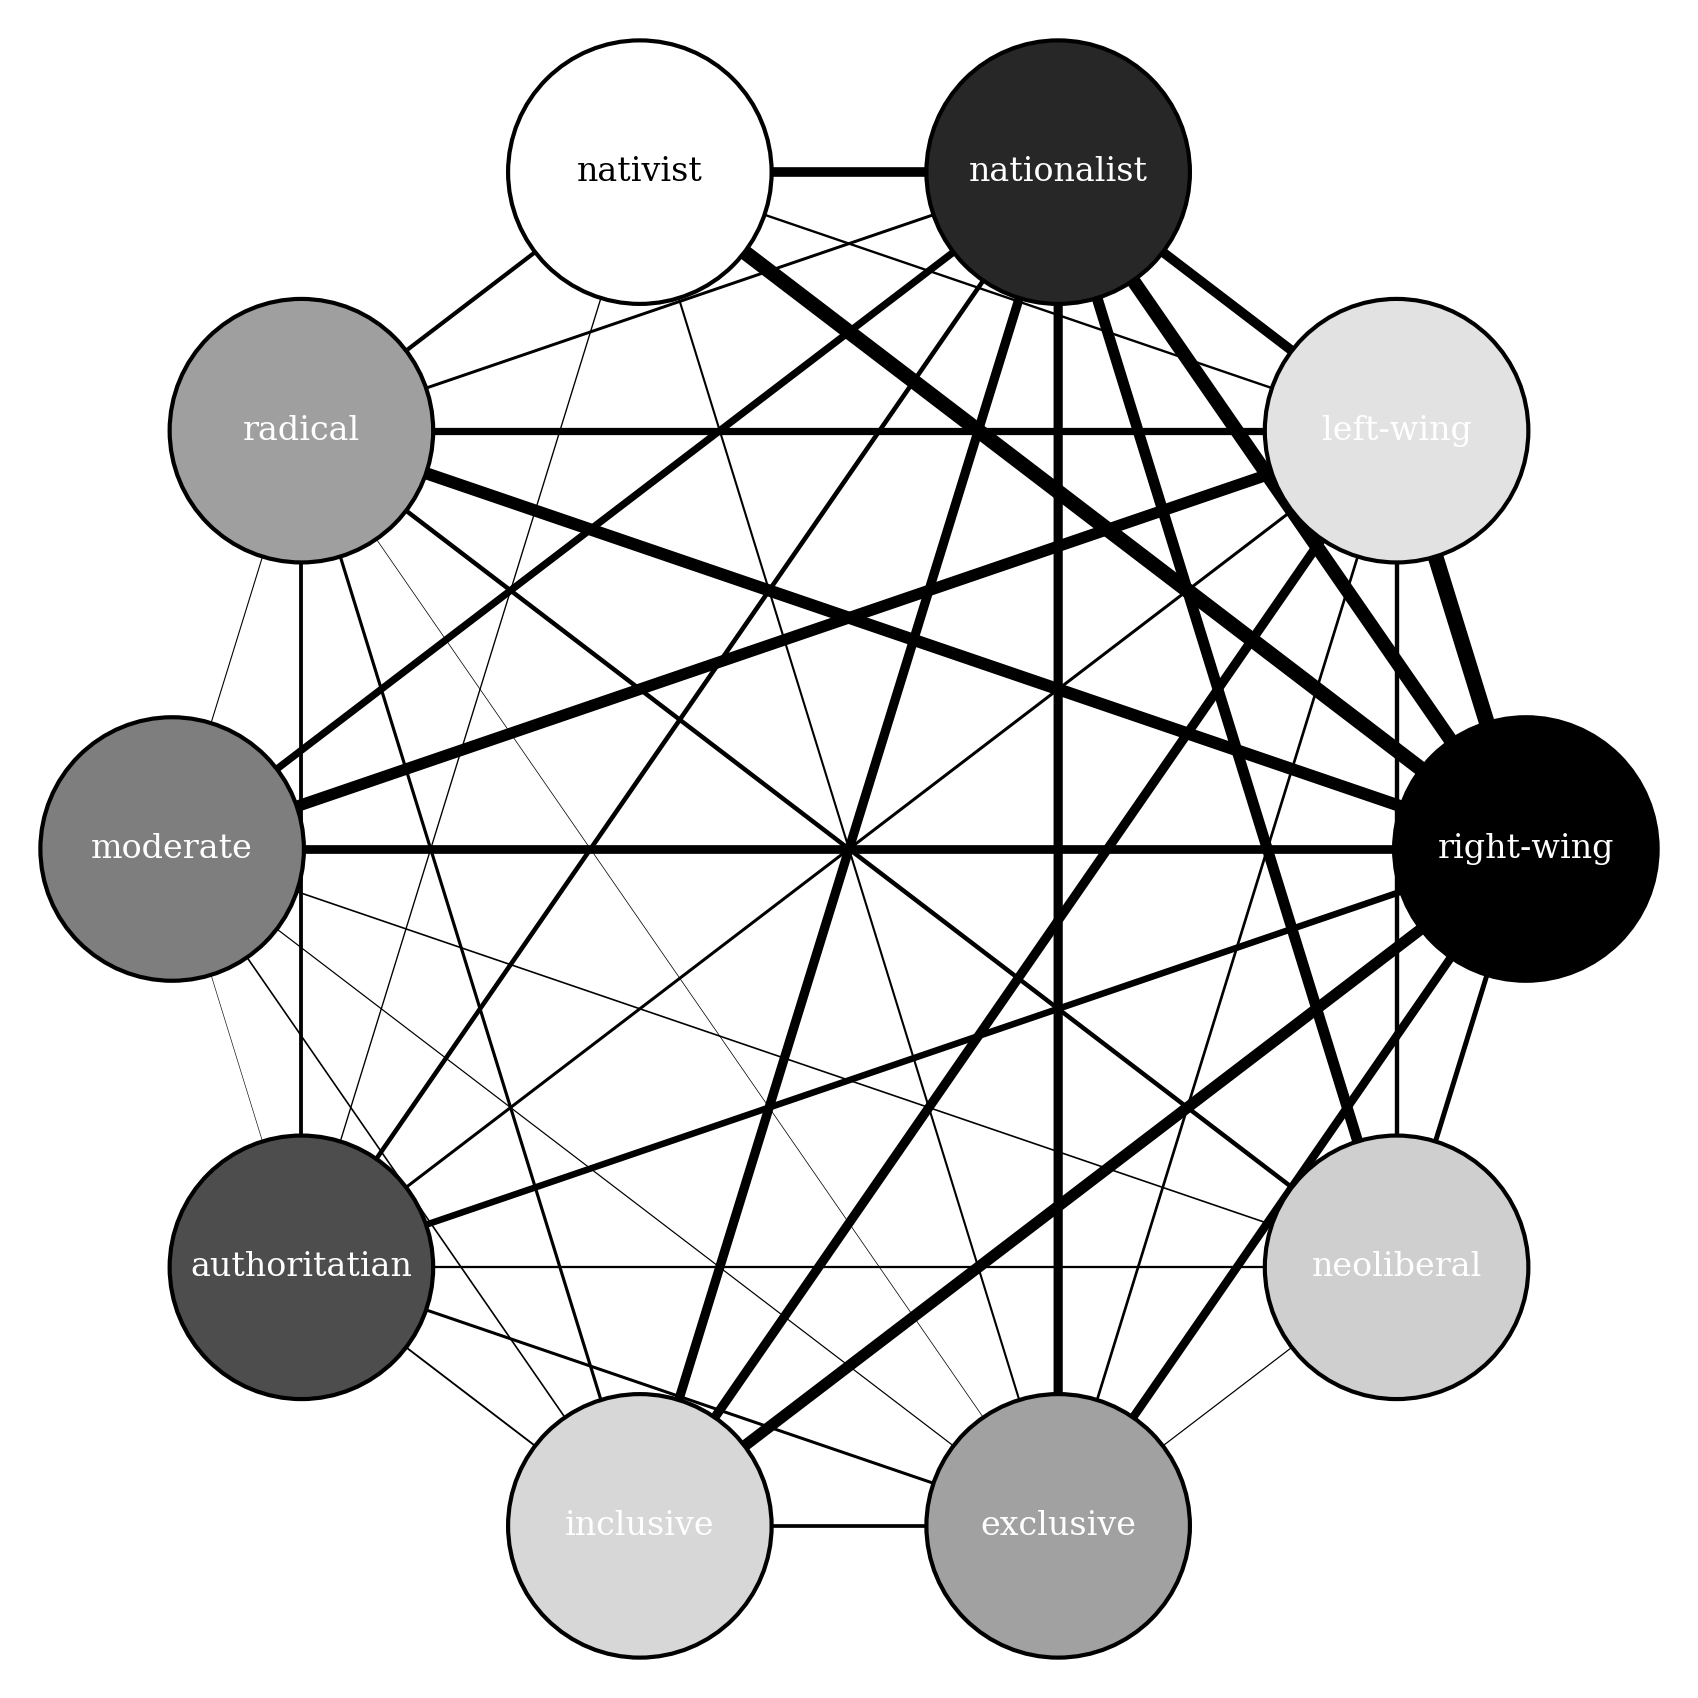

In [101]:
  #, font_size=6, c=color)
fig, ax = plt.subplots(figsize=(5.7, 5.7), dpi=300, tight_layout=True)

nx.draw_networkx_nodes(G, pos, node_size=4000, node_color=color_vals, edgecolors="black", cmap=plt.cm.binary, ax=ax)
nx.draw_networkx_edges(G, pos, width=edge_sizes, ax=ax)
for pos_tup, color in zip(pos.items(), color_vals_labels):
    ax.text(pos_tup[1][0], pos_tup[1][1], pos_tup[0], size=8, c=color, horizontalalignment='center', verticalalignment='center')

ax.set_axis_off()

In [102]:
fig.savefig("../figures/circular_network.png")

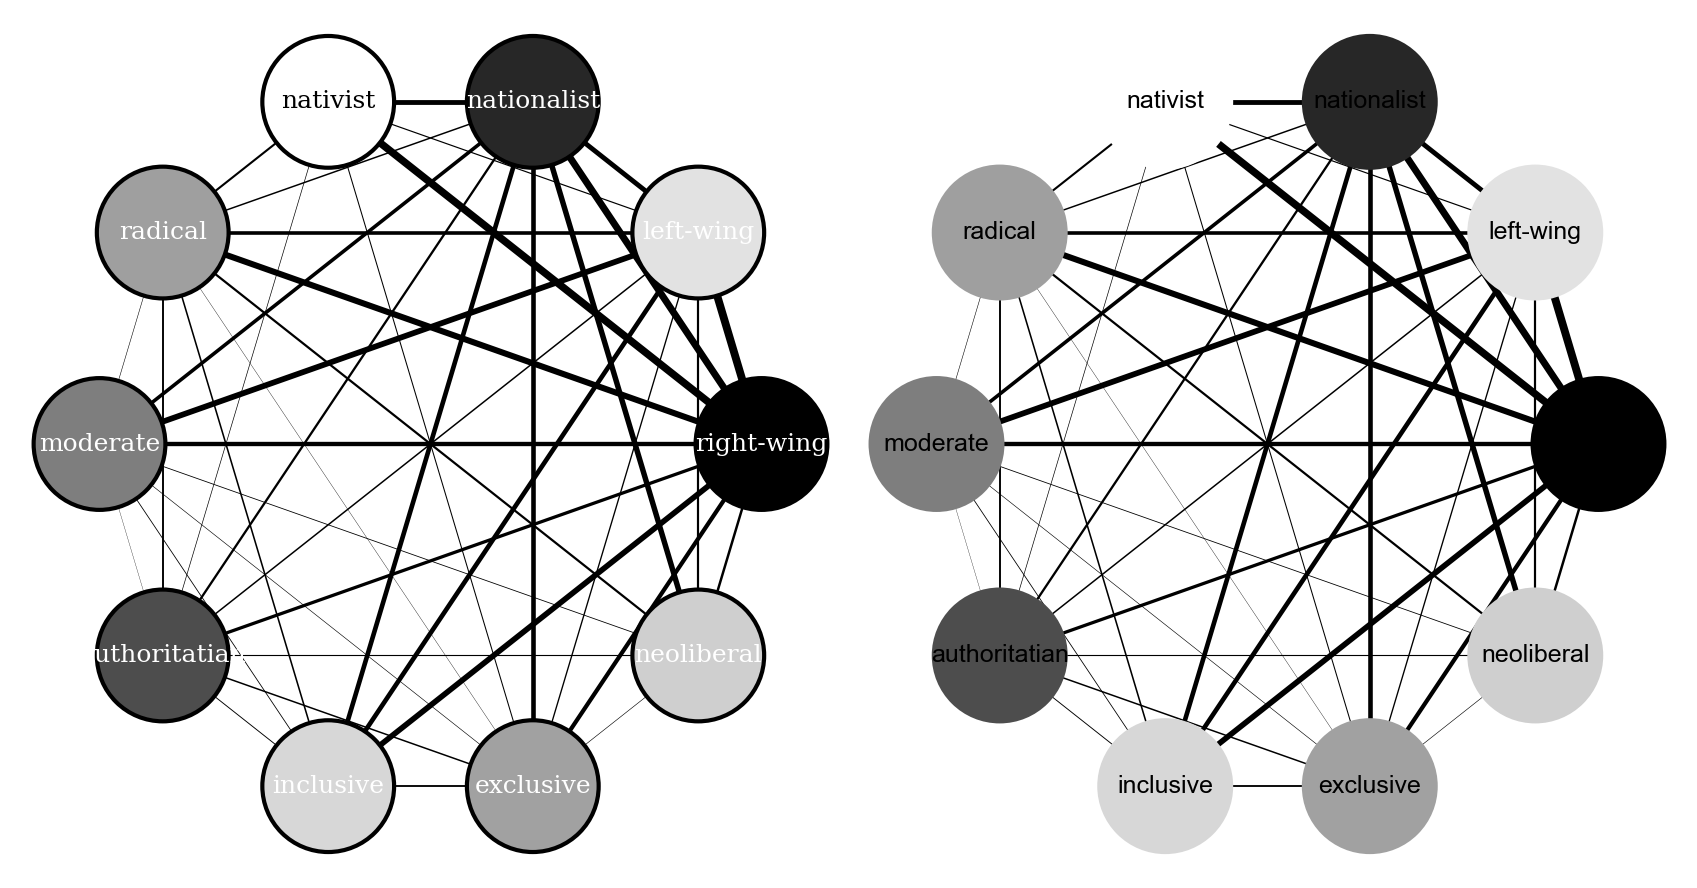

In [91]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(5.7,3), dpi=300, tight_layout=True)

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=color_vals, edgecolors="black",cmap=plt.cm.binary, ax=ax1)
nx.draw_networkx_edges(G, pos, width=edge_sizes, ax=ax1)
for pos_tup, color in zip(pos.items(), color_vals_labels):
    ax1.text(pos_tup[1][0], pos_tup[1][1], pos_tup[0], size=6, c=color, horizontalalignment='center', verticalalignment='center')

ax1.set_axis_off()

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=color_vals, cmap=plt.cm.binary, ax=ax2)
nx.draw_networkx_edges(G, pos, width=edge_sizes, ax=ax2)
nx.draw_networkx_labels(G, pos=pos, font_size=6, ax=ax2)

ax2.set_axis_off()

In [348]:
    # filter test data by year
for year in range(2011,2021):
        filtered_indeces = [i for i, y in enumerate(years_test) if int(y) == year]
        y_test_filtered = np.array(y_test)[filtered_indeces]
        X_test_filtered = X_test[filtered_indeces, :]
        y_predicted_filtered = classifier.predict(X_test_filtered)
        print(year, f1_score(y_predicted_filtered, y_test_filtered, average="weighted"))

2011 0.8375000000000001
2012 0.5573412698412697
2013 0.739767156862745
2014 0.462190785405071
2015 0.5046552890161913
2016 0.6594182742800346
2017 0.5826293756892439
2018 0.6512997432197614
2019 0.6296611271193421
2020 0.6645477345317593


363


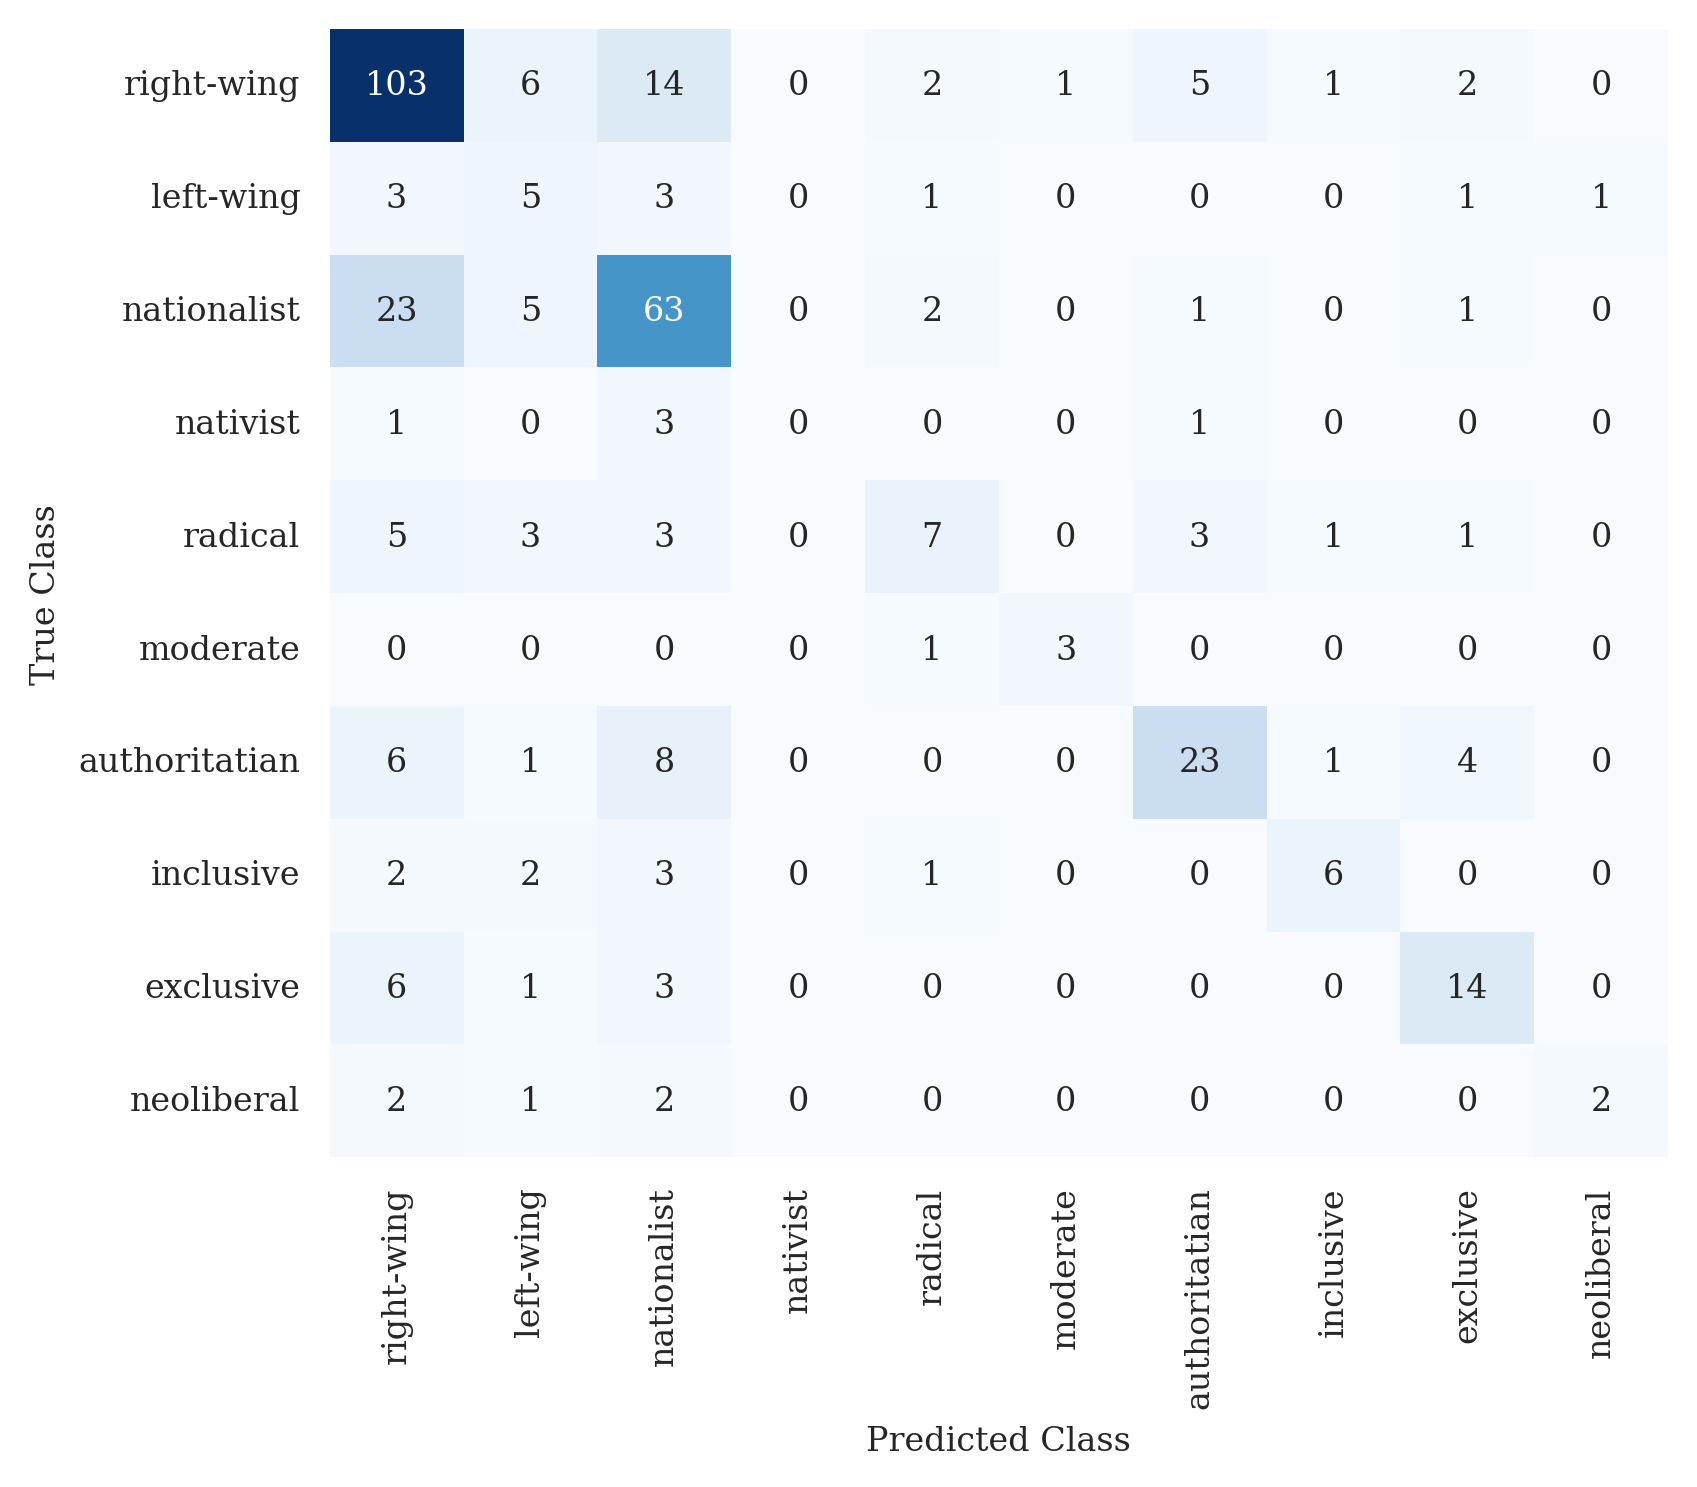

In [350]:
year = 2019
filtered_indeces = [i for i, y in enumerate(years_test) if int(y) == year]
print(len(filtered_indeces))
y_test_filtered = np.array(y_test)[filtered_indeces]
X_test_filtered = X_test[filtered_indeces, :]
y_predicted_filtered = classifier.predict(X_test_filtered)
matrix = confusion_matrix(y_test_filtered, y_predicted_filtered, labels=labels) #, normalize="true")
dataframe = pd.DataFrame(matrix, columns=labels, index=labels)

fig, ax = plt.subplots(figsize=(5.7, 5), dpi=300, tight_layout=True)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt='d', ax=ax)

ax.set_ylabel("True Class")
ax.set_xlabel("Predicted Class")
plt.show()

In [301]:
matrix.sum()

53

# NN based classification

## Simply neural network

In [126]:
# requires to be connected to a properly configured python environment with tensorflow etc.
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Embedding

In [132]:
classes

['right-wing',
 'nationalist',
 'left-wing',
 'authoritatian',
 'radical',
 'exclusive',
 'moderate',
 'neoliberal',
 'inclusive',
 'nativist']

In [130]:
classes_inxs = dict(zip(classes, range(len(classes))))

In [131]:
classes_inxs

{'right-wing': 0,
 'nationalist': 1,
 'left-wing': 2,
 'authoritatian': 3,
 'radical': 4,
 'exclusive': 5,
 'moderate': 6,
 'neoliberal': 7,
 'inclusive': 8,
 'nativist': 9}

In [128]:
def to_one_hot(y, classes):
    classes_inxs_dict = dict(zip(classes, range(len(classes))))
    results = np.zeros((len(y), len(classes)))
    for i, label in enumerate(y):
        results[i, classes_inxs_dict[label]] = 1.
    return results, classes_inxs_dict

one_hot_labels, classes_inxs_dict = to_one_hot(y, classes)

In [129]:
inxs_classes_dict = dict([(t[1], t[0]) for t in classes_inxs_dict.items()])
inxs_classes_dict

{0: 'right-wing',
 1: 'nationalist',
 2: 'left-wing',
 3: 'authoritatian',
 4: 'radical',
 5: 'exclusive',
 6: 'moderate',
 7: 'neoliberal',
 8: 'inclusive',
 9: 'nativist'}

In [18]:
one_hot_labels[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [44]:
# TRAIN vs TEST

x_train_full, x_test, y_train_full, y_test_one_hot, years_train_full, years_test = train_test_split(X, one_hot_labels, years, test_size=0.2, random_state=1)

# actual TRAIN vs. internal VALIDATION data
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=1)

In [20]:
len(years_test)

1524

In [76]:
# since our classes are highly unbalanced w1 weighted is perhaps the best metric for model performance
def f1_weighted(y_true, y_pred):
    y_true = np.ndarray.argmax(y_true.numpy(), axis=1)
    y_pred = np.ndarray.argmax(y_pred.numpy(), axis=1)
    return f1_score(y_true, y_pred, average="weighted")

In [192]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(len(x_train[0]),)))
model.add(layers.Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_weighted])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37/37 [==============================] - ETA: 0s - loss: 1.9676 - f1_weighted: 0.2075

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37/37 [==============================] - 4s 98ms/step - loss: 1.9676 - f1_weighted: 0.2075 - val_loss: 1.7352 - val_f1_weighted: 0.3005
Epoch 2/10
37/37 [==============================] - 4s 98ms/step - loss: 1.4153 - f1_weighted: 0.4407 - val_loss: 1.4593 - val_f1_weighted: 0.4464
Epoch 3/10
37/37 [==============================] - 3s 92ms/step - loss: 0.8778 - f1_weighted: 0.7001 - val_loss: 1.2551 - val_f1_weighted: 0.5622
Epoch 4/10
37/37 [==============================] - 3s 93ms/step - loss: 0.4338 - f1_weighted: 0.9063 - val_loss: 1.1764 - val_f1_weighted: 0.5996
Epoch 5/10
37/37 [==============================] - 3s 94ms/step - loss: 0.1947 - f1_weighted: 0.9790 - val_loss: 1.1742 - val_f1_weighted: 0.6275
Epoch 6/10
37/37 [==============================] - 3s 88ms/step - loss: 0.0935 - f1_weighted: 0.9974 - val_loss: 1.2127 - val_f1_weighted: 0.6279
Epoch 7/10
37/37 [==============================] - 3s 93ms/step - loss: 0.0528 - f1_weighted: 0.9996 - val_loss: 1.2451 - val_f1

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


47/47 [==============================] - 3s 62ms/step - loss: 1.2960 - f1_weighted: 0.6288


In [194]:
results = model.evaluate(x_test, y_test_one_hot)
results

 2/47 [>.............................] - ETA: 2s - loss: 0.9033 - f1_weighted: 0.7048

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


47/47 [==============================] - 3s 62ms/step - loss: 1.2960 - f1_weighted: 0.6288


[1.2959922552108765, 0.6288107633590698]

In [197]:
y_predicted_one_hot = model.predict(x_test)
y_predicted = [inxs_classes_dict[i] for i in np.argmax(y_predicted_one_hot, axis=1)]

47/47 [==============================] - 0s 5ms/step


In [198]:
f1_score(y_predicted, y_test, average="weighted")

0.6548739390014741

In [246]:
inxs_classes_dict

{0: 'right-wing',
 1: 'nationalist',
 2: 'left-wing',
 3: 'authoritatian',
 4: 'radical',
 5: 'exclusive',
 6: 'moderate',
 7: 'neoliberal',
 8: 'inclusive',
 9: 'nativist'}

In [249]:
pd.DataFrame(y_predicted_one_hot[:10].round(2), columns=labels)

,right-wing,nationalist,left-wing,authoritatian,radical,exclusive,moderate,neoliberal,inclusive,nativist
0,0.01,0.01,0.00,0.00,0.97,0.01,0.00,0.00,0.00,0.00
1,0.01,0.80,0.02,0.01,0.11,0.00,0.00,0.04,0.00,0.00
2,0.26,0.02,0.71,0.01,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.02,0.00,0.02,0.00,0.96,0.00,0.00,0.00
4,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.98,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
6,0.06,0.91,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00
7,0.04,0.84,0.02,0.02,0.02,0.00,0.04,0.00,0.01,0.01
8,0.01,0.94,0.00,0.02,0.00,0.00,0.01,0.01,0.00,0.00
9,0.00,0.95,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00


In [255]:
len(np.max(y_predicted_one_hot, axis=1))

1476

In [259]:
sum(np.max(y_predicted_one_hot, axis=1) > 0.75)

917

# Neural networks with embeddings

In [15]:
vocab = [tup[0] for tup in vocab_counts]

In [16]:
w2v = KeyedVectors.load("../data/large_data/w2v_news300.model")
w2v.most_similar("extremism")

[('religious_extremism', 0.8095038533210754),
 ('radicalism', 0.7823387980461121),
 ('violent_extremism', 0.7761071920394897),
 ('Islamic_extremism', 0.7622053027153015),
 ('Islamic_fundamentalism', 0.7453163266181946),
 ('Islamic_radicalism', 0.7362303137779236),
 ('militancy', 0.7344785928726196),
 ('radical_Islam', 0.7271879315376282),
 ('Islamist_extremism', 0.7208510041236877),
 ('extremists', 0.7103613615036011)]

In [17]:
w2v_filtered = KeyedVectors(vector_size=300)
vocab_filtered = []
# Iterate over the original KeyedVectors object
for word in vocab:
    try:
        w2v_filtered[word] = w2v[word]
        vocab_filtered.append(word)
    except:
        pass

In [19]:
w2v_filtered.vectors[0]

array([ 3.78906250e-01,  5.02929688e-02, -3.19824219e-02,  4.02343750e-01,
       -8.93554688e-02, -1.26953125e-01,  3.07617188e-02,  1.50390625e-01,
        6.88476562e-02, -1.47460938e-01, -6.68945312e-02, -9.86328125e-02,
        9.61914062e-02,  4.45312500e-01, -2.85644531e-02,  5.34667969e-02,
       -1.27563477e-02,  3.41796875e-01,  1.18652344e-01, -1.09863281e-01,
        2.12890625e-01,  2.34375000e-01,  2.63671875e-01,  2.27539062e-01,
        5.24902344e-02, -1.16210938e-01, -9.47265625e-02, -1.27929688e-01,
        5.00000000e-01,  2.00195312e-01, -1.87500000e-01,  1.78710938e-01,
        5.03540039e-03,  1.04492188e-01,  2.73437500e-01, -1.90429688e-01,
        5.46875000e-02, -1.74804688e-01,  3.90625000e-02,  6.49414062e-02,
        3.57421875e-01, -2.37304688e-01,  3.94531250e-01, -2.31933594e-02,
       -1.24023438e-01, -4.12597656e-02, -7.56835938e-02,  5.63964844e-02,
        4.62890625e-01, -1.08398438e-01, -1.06933594e-01, -4.58984375e-02,
       -6.83593750e-02, -

In [134]:
max([len(conc) for conc in concs])

20

In [135]:
vectorizer = TextVectorization(
    standardize=None,
    output_mode="int",
    output_sequence_length=20
    #vocabulary=vocab
)

In [136]:
vectorizer.adapt([" ".join(conc) for conc in concs])

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [137]:
#  index 0 is reserved for padding and index 1 is reserved for "out of vocabulary" tokens
vectorizer([["be stupid populist"]])

<tf.Tensor: shape=(1, 20), dtype=int64, numpy=
array([[2967,    1,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [138]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [139]:
voc[:5]

['', '[UNK]', 'populist', 'populism', 'party']

In [140]:
num_tokens = len(voc) + 2
embedding_dim = w2v_filtered.vectors.shape[1]
embedding_matrix = np.zeros((num_tokens, 300))
for word, i in word_index.items():
    try:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = vector = w2v[word]
    except:
        pass

In [141]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [142]:
sequences = vectorizer([" ".join(conc) for conc in concs]).numpy()
sequences[:20]

array([[ 1694,    37,   919,  1055,    56,  1350,   573,     5,   870,
            2,   194,   133,   678,  7081,  5006,   645,   426,    72,
          517, 10304],
       [ 6596,  1309,  4712,  1584,  1048,    36,  5448,   538,   118,
           12,     2,   582,  3968,    94,   142,  1370,     7,  4504,
          956,    84],
       [  118,  1305,     3,   167,   389,   236,   745,   102,   157,
         1654,     2,    10,   687,  2607,  2592,  3722,  6241,  8597,
          517,    12],
       [ 1140,   492,   913,   261,  6663,   499,  2319,  2757,  1133,
           91,     2,  1140,  6493,    21,    84,   461,  1447,   664,
          206,    27],
       [ 2227,   727,  4166,   203,    75,  1599,  2985,  1874,    63,
          103,     2,    10,  1778,     9,   195,  2009,   175,  2027,
           25,  2951],
       [    9,   195,  2009,   175,  2027,    25,  2951,   206,  1151,
            2,  2607,   687,     7,  2339,    49,   637,  2574,     2,
         8382,     7],
       [  

In [163]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(512, 5, activation="relu")(embedded_sequences)
#x = layers.MaxPooling1D(5)(x)
#x = layers.Conv1D(128, 5, activation="relu")(x)
#x = layers.MaxPooling1D(5)(x)
#x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(classes), activation='softmax')(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 300)         4042200   
                                                                 
 conv1d_25 (Conv1D)          (None, None, 512)         768512    
                                                                 
 global_max_pooling1d_16 (Gl  (None, 512)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                          

In [164]:
# TRAIN vs TEST

x_train_full, x_test, y_train_full, y_test_one_hot = train_test_split(sequences, one_hot_labels, test_size=0.2, random_state=1)

# actual TRAIN vs. internal VALIDATION data
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=1)

In [165]:
model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=[f1_weighted]
)
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


74/74 [==============================] - ETA: 0s - loss: 1.9040 - f1_weighted: 0.2481

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


74/74 [==============================] - 7s 93ms/step - loss: 1.9040 - f1_weighted: 0.2481 - val_loss: 1.7933 - val_f1_weighted: 0.2177
Epoch 2/10
74/74 [==============================] - 7s 91ms/step - loss: 1.6145 - f1_weighted: 0.3801 - val_loss: 1.5688 - val_f1_weighted: 0.4101
Epoch 3/10
74/74 [==============================] - 7s 89ms/step - loss: 1.0555 - f1_weighted: 0.5993 - val_loss: 1.4712 - val_f1_weighted: 0.4837
Epoch 4/10
74/74 [==============================] - 7s 89ms/step - loss: 0.5099 - f1_weighted: 0.8199 - val_loss: 1.5990 - val_f1_weighted: 0.5279
Epoch 5/10
74/74 [==============================] - 6s 87ms/step - loss: 0.2150 - f1_weighted: 0.9384 - val_loss: 2.0242 - val_f1_weighted: 0.4941
Epoch 6/10
74/74 [==============================] - 6s 88ms/step - loss: 0.0868 - f1_weighted: 0.9815 - val_loss: 1.7980 - val_f1_weighted: 0.5629
Epoch 7/10
74/74 [==============================] - 6s 85ms/step - loss: 0.0494 - f1_weighted: 0.9906 - val_loss: 1.9888 - val_f1

In [166]:
results = model.evaluate(x_test, y_test_one_hot)
results

 2/47 [>.............................] - ETA: 2s - loss: 1.4146 - f1_weighted: 0.6781

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


47/47 [==============================] - 3s 57ms/step - loss: 2.0383 - f1_weighted: 0.5782


[2.0383424758911133, 0.5782015919685364]

In [167]:
y_predicted_one_hot = model.predict(x_test)
y_predicted = [inxs_classes_dict[i] for i in np.argmax(y_predicted_one_hot, axis=1)]

f1_score(y_predicted, y_test, average="weighted")

24/47 [==============>...............] - ETA: 0s

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


47/47 [==============================] - 0s 7ms/step


0.6250736879356592